In [52]:
import pandas as pd
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Math, Latex

[*********************100%***********************]  5 of 5 completed


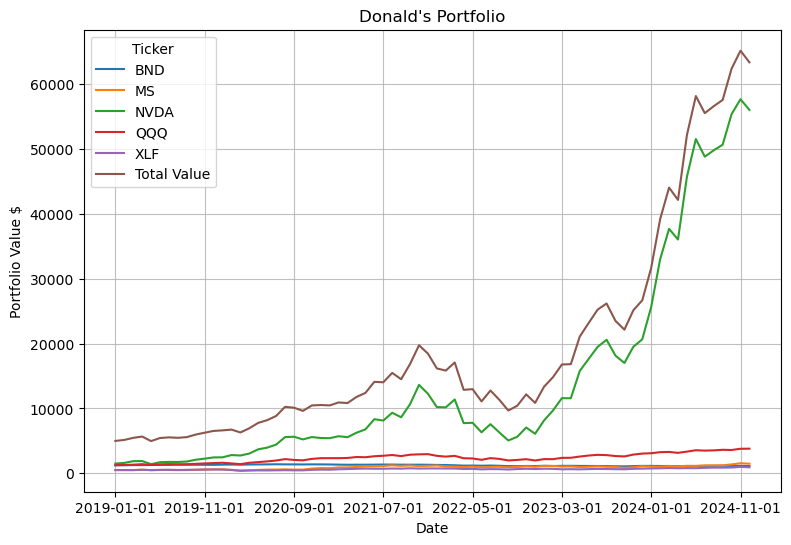

In [48]:
# Play around the model -> Personal Preference: 
# Stocks Selected:
personal_stocks = ["NVDA","BND","MS","XLF","QQQ"]
starting = "2019-01-01"
ending = "2024-12-02"
personal_data = yf.download(personal_stocks, start = starting, end = ending, interval = "1mo")["Close"]
personal_data.index = personal_data.index.strftime("%Y-%m-%d")
personal_data
initial_investment = 5000
# Weighting based on Personal Preference:
weights_per_stock = np.array([25,10,30,25,10]) / 100
invest_per_stock = weights_per_stock * initial_investment
my_portfolio = personal_data / personal_data.iloc[0] * invest_per_stock
my_portfolio["Total Value"] = my_portfolio.sum(axis=1)
plt.figure(figsize=(9,6))
plt.title("Donald's Portfolio")
plt.ylabel("Portfolio Value $")
my_portfolio.plot(ax=plt.gca())
plt.grid(alpha = 0.8)

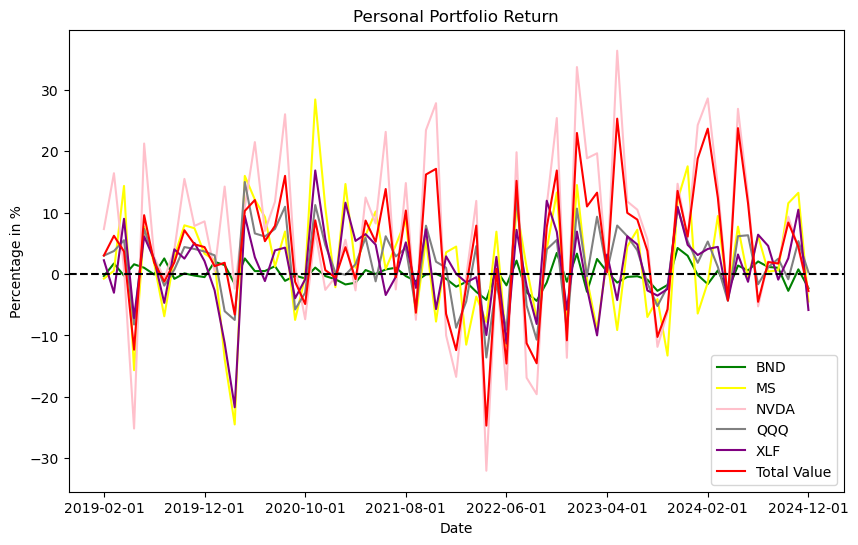

In [49]:
portfolio_return = my_portfolio.pct_change()
portfolio_return = portfolio_return.drop(portfolio_return.index[0])
portfolio_return *=100
plt.figure(figsize=(10,6))
colour = ["green", "yellow", "pink", "grey", "purple"]
i = 0
for col in portfolio_return.columns:
    if col != "Total Value":
        portfolio_return[col].plot(ax=plt.gca(), color = colour[i], label = col)
        i+=1
    else:
        portfolio_return[col].plot(ax=plt.gca(), label = col, color = 'red')

plt.axhline(y=0, color = 'black', linestyle= '--')
plt.title("Personal Portfolio Return")
plt.ylabel("Percentage in %")
plt.legend()

In [50]:
print("Mean: ")
print(portfolio_return.mean())
print()

print("Volatility: ")
print(portfolio_return.std())

Mean: 
Ticker
BND           -0.135742
MS             1.962570
NVDA           6.184767
QQQ            1.752380
XLF            1.088624
Total Value    4.127230
dtype: float64

Volatility: 
Ticker
BND             1.793630
MS              9.196478
NVDA           14.005964
QQQ             5.941207
XLF             6.433102
Total Value     9.992059
dtype: float64


Note:
- The effects of diversification is clearly demonstrated in my personal portfolio, it brings down the volatility of the portfolio but also improves the expected return. Here are some remarks I took into consideration while forming this:

- The risk of a portfolio depends on how the securities in it move in relation to each other. 
    Remarks: 
        -  Nvidia acted as a good hedge agains the shortfall in XLF and MS. i.e around 2020, 
        -  The XLF and MS also heged the downfall of Nvidia, i.e around 2022.  => personal conclusion, they complement each otehr. 
        
- Statistics wise: 
        - an expected return of 4.12% and volatility of 9.99%.
        - The performance clearly beats a single stock. -> lowers risk and improves return. 
        




- Nvidia High-growth tech, provides high return and very volatile. 
- Vanguard Total Bond BND, provides stability & downturn hedge
- Financial Sector SPDR Fund XLF, provides a wider financial exposure
- Tech Sector, QQQ Trust QQQ, Growth from Nasdaq-100, ensuring tech exposure


- Generating a healthy monthly return, while reducing the risk. 

- Nvidia is indeed a good stock hahaha.
